In [0]:
import pandas as pd
from pandas_datareader import get_data_yahoo
price = get_data_yahoo('005930.KS','2020-01-01')
price = price.fillna('ffill')
price = price.dropna()
price.to_csv('stocks.csv', encoding='ms949')
price.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-17,62000,61200,61600,61500,8740596,61500
2020-02-18,60900,59700,60800,59800,16674266,59800
2020-02-19,60400,59400,59800,60200,12923388,60200


In [0]:

# price = price.set_index('Date')
price.index = pd.DatetimeIndex(price.index)
price.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-17,62000,61200,61600,61500,8740596,61500
2020-02-18,60900,59700,60800,59800,16674266,59800
2020-02-19,60400,59400,59800,60200,12923388,60200


In [0]:
dataset = price.reset_index()
dataset.head(2)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-02,56000,55000,55500,55200,12993228,55200
1,2020-01-03,56600,54900,56000,55500,15422255,55500


In [0]:
dataset = price.reset_index()
del dataset['Date']
del dataset['Volume']
del dataset['Adj Close']
dataset.columns = ['Open','High','Low','Close']
dataset.tail(3)

,Open,High,Low,Close
30,62000,61200,61600,61500
31,60900,59700,60800,59800
32,60400,59400,59800,60200


In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())

2.1.0
/device:GPU:0


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras.layers import LSTM

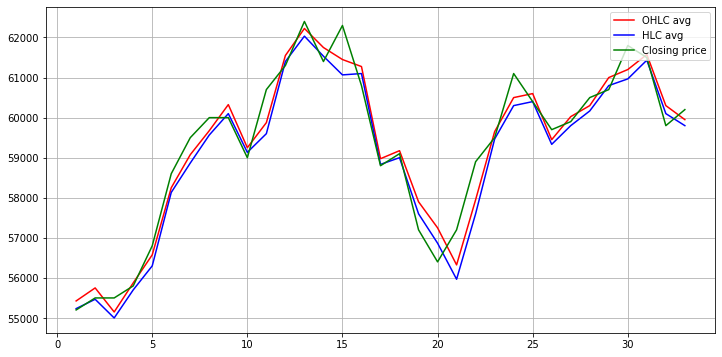

In [0]:
np.random.seed(33)  

obs       = np.arange(1, len(dataset) + 1, 1)
OHLC_avg  = dataset.mean(axis = 1)           
HLC_avg   = dataset[['High', 'Low', 'Close']].mean(axis = 1)
close_val = dataset[['Close']]
plt.figure(figsize=(12,6))
plt.plot(obs, OHLC_avg,  'r', label = 'OHLC avg')
plt.plot(obs, HLC_avg,   'b', label = 'HLC avg')
plt.plot(obs, close_val, 'g', label = 'Closing price')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

In [0]:
OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg), 1) )
print("일평균 데이터 : {},\n {}".format( OHLC_avg[:5], type(OHLC_avg)))

scaler   = MinMaxScaler(feature_range=(0, 1))
OHLC_avg = scaler.fit_transform(OHLC_avg)  
print("정규화 데이터 : {}, {}".format(type(OHLC_avg), OHLC_avg[:5]))


일평균 데이터 : [[55425.]
 [55750.]
 [55150.]
 [55875.]
 [56575.]],
 <class 'numpy.ndarray'>
정규화 데이터 : <class 'numpy.ndarray'>, [[0.03886926]
 [0.08480565]
 [0.        ]
 [0.1024735 ]
 [0.20141343]]


In [0]:
def new_dataset(dataset, step_size):
    import numpy as np 
    data_X, data_Y = [], []
    for i in range(len(dataset) - step_size - 1):
        data_X.append(dataset[i : (i+step_size), 0])  
        data_Y.append(dataset[i + step_size,     0])
    return np.array(data_X), np.array(data_Y)

train_OHLC = int(len(OHLC_avg) * 0.75)
test_OHLC  = len(OHLC_avg) - train_OHLC
train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]

trainX, trainY = new_dataset(train_OHLC, 1)
testX, testY   = new_dataset(test_OHLC, 1)
print(trainX.shape, trainY.shape)  
print(trainX[1], trainY[1])

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX  = np.reshape(testX,  (testX.shape[0],  1, testX.shape[1]))
trainX.shape, testX.shape

(22, 1) (22,)
[0.08480565] 0.0


((22, 1, 1), (7, 1, 1))

In [0]:
step_size = 1
model = Sequential()
model.add(LSTM(256, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(128))
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss='mean_squared_error', optimizer='adam') 
model.fit(trainX, trainY, epochs=100, batch_size=10, verbose=2)

Train on 22 samples
Epoch 1/100
22/22 - 4s - loss: 0.3517
Epoch 2/100
22/22 - 0s - loss: 0.3194
Epoch 3/100
22/22 - 0s - loss: 0.2859
Epoch 4/100
22/22 - 0s - loss: 0.2462
Epoch 5/100
22/22 - 0s - loss: 0.2084
Epoch 6/100
22/22 - 0s - loss: 0.1660
Epoch 7/100
22/22 - 0s - loss: 0.1192
Epoch 8/100
22/22 - 0s - loss: 0.0796
Epoch 9/100
22/22 - 0s - loss: 0.0495
Epoch 10/100
22/22 - 0s - loss: 0.0317
Epoch 11/100
22/22 - 0s - loss: 0.0321
Epoch 12/100
22/22 - 0s - loss: 0.0409
Epoch 13/100
22/22 - 0s - loss: 0.0420
Epoch 14/100
22/22 - 0s - loss: 0.0358
Epoch 15/100
22/22 - 0s - loss: 0.0300
Epoch 16/100
22/22 - 0s - loss: 0.0276
Epoch 17/100
22/22 - 0s - loss: 0.0275
Epoch 18/100
22/22 - 0s - loss: 0.0273
Epoch 19/100
22/22 - 0s - loss: 0.0265
Epoch 20/100
22/22 - 0s - loss: 0.0264
Epoch 21/100
22/22 - 0s - loss: 0.0249
Epoch 22/100
22/22 - 0s - loss: 0.0247
Epoch 23/100
22/22 - 0s - loss: 0.0240
Epoch 24/100
22/22 - 0s - loss: 0.0237
Epoch 25/100
22/22 - 0s - loss: 0.0232
Epoch 26/100
2

In [0]:
trainPredict = model.predict(trainX)
testPredict  = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY       = scaler.inverse_transform([trainY])
testPredict  = scaler.inverse_transform(testPredict)
testY        = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore  = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Train RMSE: {:.2f}\nTest  RMSE: {:.2f}'.format(trainScore, testScore))

Train RMSE: 1019.77
Test  RMSE: 758.74


In [0]:
trainPredictPlot          = np.empty_like(OHLC_avg)
trainPredictPlot[ : , : ] = np.nan
trainPredictPlot[step_size : len(trainPredict) + step_size , : ] = trainPredict

testPredictPlot       = np.empty_like(OHLC_avg)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (step_size*2) + 1 : len(OHLC_avg) - 1 , : ] = testPredict

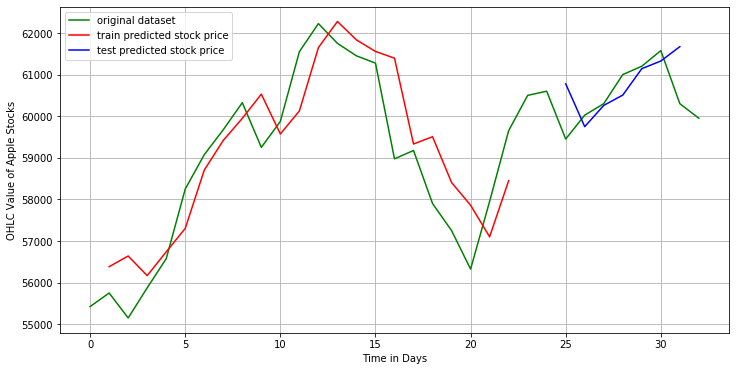

In [0]:
OHLC_avg = scaler.inverse_transform(OHLC_avg)

plt.figure(figsize=(12,6))
plt.plot(OHLC_avg,         'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'train predicted stock price')
plt.plot(testPredictPlot,  'b', label = 'test predicted stock price')
plt.xlabel('Time in Days')
plt.ylabel('OHLC Value of Apple Stocks')
plt.legend(loc = 'upper left')
plt.grid(); plt.show()

In [0]:
last_val        = testPredict[-1:]
last_val_scaled = last_val / last_val
next_val        = model.predict(np.reshape(last_val_scaled, (1,1,1)))
last_price      = np.asscalar(last_val)
next_price      = np.asscalar(last_val * next_val)
print ("마지막 예측가격 : {} \n다음날 예측가격 : {} \n증감률 : {}".format(
        last_price, 
        next_price, 
        (next_price - last_val) / last_val) )

마지막 예측가격 : 61670.96484375 
다음날 예측가격 : 62116.46484375 
증감률 : [[0.00722382]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """
